Table of Contents
- What is Probability?
- Axioms of Probability
- Rules of Probability
    - Complement Rule
    - Additoin Rule
    - Multiplication Rule
    - Conditional Probability
    - Bayes' Theorem


## [ What is Probability? ]
Probability is the measure of the likelihood that an event will occur. It is a value between 0 and 1
- 0 means impossible event.
- 1 means certain event.

> If all outcomes are equally likely:    $ {P}(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}} $

## [ Axioms of Probability (Kolmogorov's Axioms) ]

#### Axiom 1: **Non-negativity**
For any event A, 
>$ {P}(A) >= 0 $

#### Axiom 2: **Normalization**
The probability of the sample space is 1.
> $ {P}(S) = 1 $

#### Axiom 3: **Additivity**
If A and B are mutually exclusive (cannot happen together)
> $ P(A \cup B) = P(A) + P(B) $

In [94]:
A = 0.3  # P(A)
B = 0.5  # P(B), assuming A and B are mutually exclusive
P_union = A + B
print("P(A ∪ B) =", P_union)

P(A ∪ B) = 0.8


## [ Rules of Probability ]

#### Rule 1: Complement Rule  
$
P(A') = 1 - P(A)
$


In [95]:
P_head = 0.5
P_not_head = 1 - P_head
print("P(Not Head) =", P_not_head)


P(Not Head) = 0.5



#### Rule 2: Addition Rule (General Case)  
For any two events A and B:  
$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$

In [96]:
P_A = 0.6
P_B = 0.5
P_A_and_B = 0.2
P_A_or_B = P_A + P_B - P_A_and_B
print("P(A ∪ B) =", P_A_or_B)

P(A ∪ B) = 0.9000000000000001



#### Rule 3: Multiplication Rule  
- For **independent** events:  
$
P(A \cap B) = P(A) \cdot P(B)
$

- For **dependent** events:  
$
P(A \cap B) = P(A) \cdot P(B|A)
$

In [97]:
P_A = 0.5
P_B = 0.4
P_A_and_B = P_A * P_B
print("P(A ∩ B) =", P_A_and_B)

P(A ∩ B) = 0.2



#### Rule 4: Conditional Probability 
> Conditional probability is the chance of an event happening given that another event has already happened 
$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$

### ✨ Example:
Suppose you're in a class of 100 students:
- 40 students are girls.
- 10 girls wear glasses.

**Question**: What is the probability that a student wears glasses **given** they are a girl?

> We already know the student is a girl (40 total), and 10 of them wear glasses.  
> So, the **conditional probability** is:

$
P(\text{Glasses} \mid \text{Girl}) = \frac{10}{40} = 0.25
$


In [98]:
P_A_and_B = 0.2
P_B = 0.5
P_A_given_B = P_A_and_B / P_B
print("P(A|B) =", P_A_given_B)


P(A|B) = 0.4



#### Rule 5: Bayes’ Theorem 
> Bayes’ Theorem helps you reverse a conditional probability — it answers:
> 
> 👉 "What’s the probability that a person has a disease **given** they tested positive?"  
> Even when we only know:  
> - how common the disease is (prior)  
> - how accurate the test is (likelihood)

---

### ✨ Example (Disease Testing):

Let’s say:
- Only 1% of people have a disease.  
- The test is 99% accurate.  
- You test positive.

**Question**: Do you really have the disease?

Even with a positive result, it's **still not very likely**, because the disease is rare.  
Bayes’ theorem shows the actual chance is around **~9%**, not 99%.

This happens because **false positives** affect the result, especially when the disease is rare.

---

$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$

- **P(A)**: Probability you have the disease  
- **P(B|A)**: Probability of testing positive if you have it  
- **P(B)**: Total probability of a positive test  
- **P(A|B)**: Probability of having the disease **given** a positive test


In [99]:
P_A = 0.01           # Prior probability of having a disease
P_B_given_A = 0.9    # True positive rate
P_B = 0.05           # Overall probability of testing positive

P_A_given_B = (P_B_given_A * P_A) / P_B
print("P(Disease | Test Positive) =", P_A_given_B)


P(Disease | Test Positive) = 0.18000000000000002


In [100]:
# coin and dice example

import numpy as np
import pandas as pd 

# set seed for reproducibility
np.random.seed(42)

# Simulate a dataset for mini project: Coin Toss and Die Roll
# Simulate 1000 coin tosses and 1000 die rolls
coin_tosses = np.random.choice(["Head", "Tail"], size=1000)
dice_rolls = np.random.choice([1,2,3,4,5,6], size=1000)

# creating a dataframe
df = pd.DataFrame({'Coin': coin_tosses, 'Dice': dice_rolls})

# basic probability estimates
P_head = np.mean(df['Coin'] == 'Head')
P_tail = np.mean(df['Coin'] == 'Tail')

P_dice_6 = np.mean(df['Dice'] == 6)
P_even_dice = np.mean(df['Dice'] % 2 == 0)

# joint and conditional probability
P_head_and_dice_6 = np.mean((df['Coin'] == 'Head') & (df['Dice'] == 6))
P_dice_6_given_head = P_head_and_dice_6 / P_head if P_head != 0 else 0

# bayes' theorem: Estimate P(Head | Dice=6)
P_dice_6_and_head = P_head_and_dice_6
P_head_given_dice_6 = P_dice_6_and_head / P_dice_6 if P_dice_6 != 0 else 0


result = {
    "P(Head)": P_head,
    "P(Tail)": P_tail,
    "P(Dice=6)": P_dice_6,
    "P(Dice is even)": P_even_dice,
    "P(Head ∩ Die=6)": P_head_and_dice_6,
    "P(Die=6 | Head)": P_dice_6_given_head,
    "P(Head | Die=6)": P_head_given_dice_6
}

result_df = pd.DataFrame.from_dict(result, orient='index', columns=["Probability"])
result_df.round(3)  # round off to 3 decimals

,Probability
P(Head),0.490
P(Tail),0.510
P(Dice=6),0.170
P(Dice is even),0.471
P(Head ∩ Die=6),0.092
P(Die=6 | Head),0.188
P(Head | Die=6),0.541


/tmp/ipykernel_2323/1982021968.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Coin', data=df, palette='pastel')


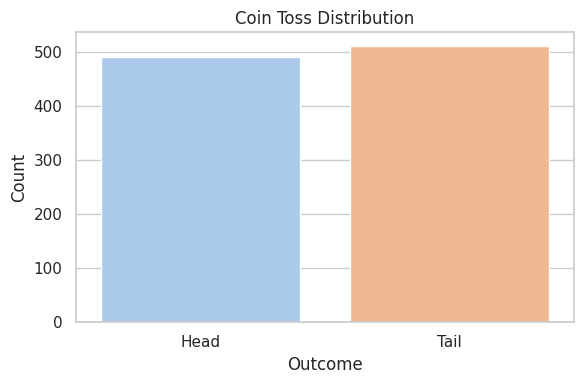

/tmp/ipykernel_2323/1982021968.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dice', data=df, palette='muted')


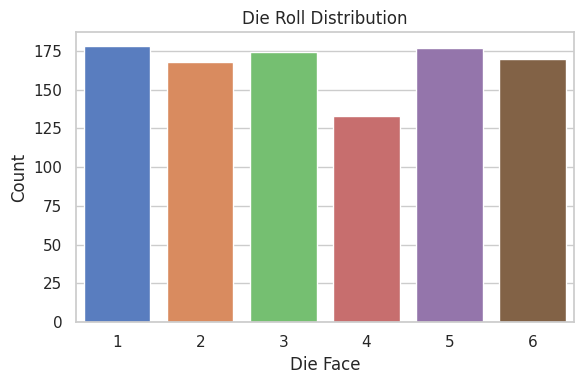

/tmp/ipykernel_2323/1982021968.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Coin', data=df[df['Dice'] == 6], palette='cool')


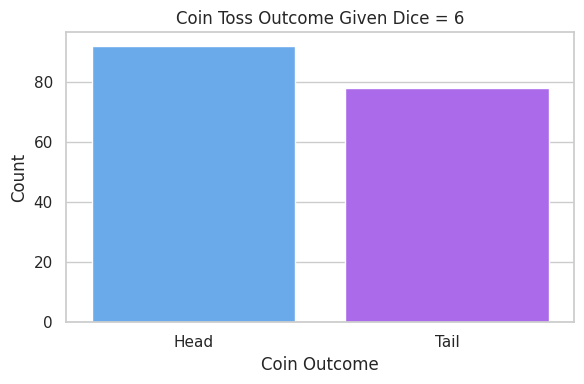

/tmp/ipykernel_2323/1982021968.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dice', data=df[df['Coin'] == 'Head'], palette='crest')


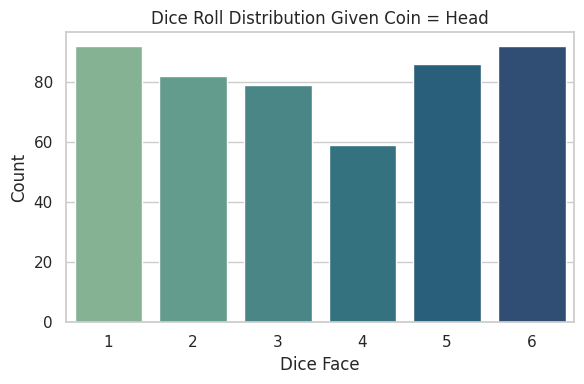

In [101]:
import matplotlib.pyplot as plt 
import seaborn as sns

# set plot style
sns.set(style="whitegrid")

# plot 1: coin toss distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Coin', data=df, palette='pastel')
plt.title("Coin Toss Distribution")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.tight_layout()
plt.show()


# plot 2: die roll distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Dice', data=df, palette='muted')
plt.title("Die Roll Distribution")
plt.ylabel("Count")
plt.xlabel("Die Face")
plt.tight_layout()
plt.show()


# plot 3: joint distribution - coin toss vs dice roll (only for dice = 6)
plt.figure(figsize=(6, 4))
sns.countplot(x='Coin', data=df[df['Dice'] == 6], palette='cool')
plt.title("Coin Toss Outcome Given Dice = 6")
plt.ylabel("Count")
plt.xlabel("Coin Outcome")
plt.tight_layout()
plt.show()


# plot 4: joint distribution - dice roll vs coin toss (only for head)
plt.figure(figsize=(6, 4))
sns.countplot(x='Dice', data=df[df['Coin'] == 'Head'], palette='crest')
plt.title("Dice Roll Distribution Given Coin = Head")
plt.ylabel("Count")
plt.xlabel("Dice Face")
plt.tight_layout()
plt.show()

In [102]:
# rolling two dice example
# to find:
    # sum probabilities (P(Sum = 7))
    # joint outcomes (P(Dice1 = 3) ∩ (Dice2 = 4))
    # conditional (P(Sum > 8 | Dice1 > 4))

no_of_rolls = 2000
dice1_roll =np.random.choice([1,2,3,4,5,6], size=no_of_rolls)
dice2_roll =np.random.choice([1,2,3,4,5,6], size=no_of_rolls)

df2 = pd.DataFrame({'Dice1': dice1_roll, "Dice2": dice2_roll})
# print(df2)


In [103]:
# P(Sum = 7)
sum_equals_7 = df2[df2['Dice1'] + df2['Dice2'] == 7]
count = len(sum_equals_7)
P_sum_equals_7 = count / no_of_rolls

print("P(Sum = 7) =", P_sum_equals_7)

P(Sum = 7) = 0.1575


/tmp/ipykernel_2323/4178917785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_counts.index, y=sum_counts.values, palette='viridis')


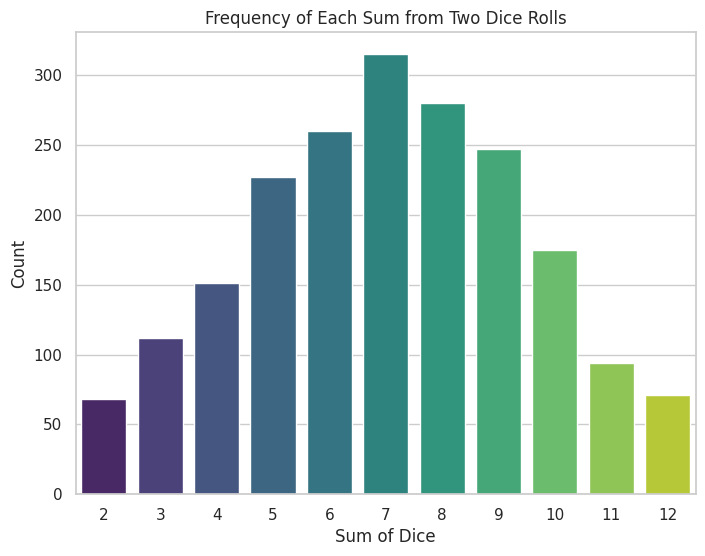

In [108]:
# add a new column for sum of dice
df2['Sum'] = df2['Dice1'] + df2['Dice2']

# count frequency of each sum
sum_counts = df2['Sum'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=sum_counts.index, y=sum_counts.values, palette='viridis')
plt.title('Frequency of Each Sum from Two Dice Rolls')
plt.xlabel('Sum of Dice')
plt.ylabel('Count')
# plt.axvline(x=5.5, color='gray', linestyle='--', alpha=0.5)
plt.show()

In [104]:
# (P(Dice1 = 3) ∩ (Dice2 = 4))
joint_event = df2[(df2['Dice1'] == 3) & (df2['Dice2'] == 4)]
P_joint = len(joint_event) / no_of_rolls

print("P(Dice1 = 3) ∩ (Dice2 = 4) =", P_joint)

P(Dice1 = 3) ∩ (Dice2 = 4) = 0.0225


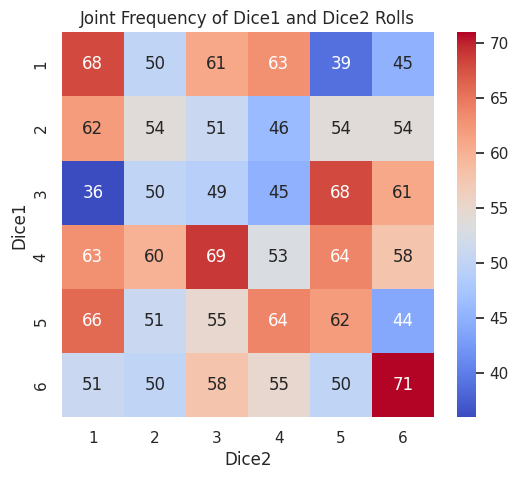

In [110]:
# Create a pivot table (Dice1 vs Dice2)
joint_table = pd.crosstab(df2['Dice1'], df2['Dice2'])

# Plot as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(joint_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Joint Frequency of Dice1 and Dice2 Rolls')
plt.xlabel('Dice2')
plt.ylabel('Dice1')
plt.show()


In [105]:
# conditional (P(Sum > 8 | Dice1 > 4))

conditional_event = df2[(df2['Dice1'] + df2['Dice2'] == 8) | (df2['Dice1'] > 4)]
P_conditional = len(conditional_event) / no_of_rolls

print("P(Sum > 8 | Dice1 > 4)", P_conditional)

P(Sum > 8 | Dice1 > 4) 0.426
